In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded=files.upload()

Saving Food_Delivery_Times.csv to Food_Delivery_Times.csv


In [6]:
df=pd.read_csv('Food_Delivery_Times.csv')
df

,Order_ID,Distance_km,Weather,Traffic_Level,Time_of_Day,Vehicle_Type,Preparation_Time_min,Courier_Experience_yrs,Delivery_Time_min
0,522,7.93,Windy,Low,Afternoon,Scooter,12,1.0,43
1,738,16.42,Clear,Medium,Evening,Bike,20,2.0,84
2,741,9.52,Foggy,Low,Night,Scooter,28,1.0,59
3,661,7.44,Rainy,Medium,Afternoon,Scooter,5,1.0,37
4,412,19.03,Clear,Low,Morning,Bike,16,5.0,68
...,...,...,...,...,...,...,...,...,...
995,107,8.50,Clear,High,Evening,Car,13,3.0,54
996,271,16.28,Rainy,Low,Morning,Scooter,8,9.0,71
997,861,15.62,Snowy,High,Evening,Scooter,26,2.0,81
998,436,14.17,Clear,Low,Afternoon,Bike,8,0.0,55


In [10]:
f=['Distance_km','Preparation_Time_min','Weather','Traffic_Level']
t=['Delivery_Time_min']
df=df[t+f].copy()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Delivery_Time_min     1000 non-null   int64  
 1   Distance_km           1000 non-null   float64
 2   Preparation_Time_min  1000 non-null   int64  
 3   Weather               970 non-null    object 
 4   Traffic_Level         970 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [12]:
df['Preparation_Time_min'].fillna(df['Preparation_Time_min'].mean(),inplace=True)
df['Weather'].fillna(df['Weather'].mode(),inplace=True)
df['Traffic_Level'].fillna(df['Traffic_Level'].mode(),inplace=True)

/tmp/ipython-input-2877316809.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Preparation_Time_min'].fillna(df['Preparation_Time_min'].mean(),inplace=True)
/tmp/ipython-input-2877316809.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].met

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Delivery_Time_min     1000 non-null   int64  
 1   Distance_km           1000 non-null   float64
 2   Preparation_Time_min  1000 non-null   int64  
 3   Weather               970 non-null    object 
 4   Traffic_Level         970 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 39.2+ KB


In [15]:
df=pd.get_dummies(df, columns=['Weather','Traffic_Level'],drop_first=True)

In [19]:
x=df.drop(columns=t).values
y=df[t].values

In [20]:
s1=MinMaxScaler()
x=s1.fit_transform(x)

In [21]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [22]:
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=model.predict(x_test)

In [24]:
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [25]:
print("--- Model Training and Evaluation Results ---")
print(f"Model Coefficients (Features): {model.coef_}")
print(f"Model Intercept: {model.intercept_}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")

--- Model Training and Evaluation Results ---
Model Coefficients (Features): [[ 58.10328125  23.64993322   6.10558262   4.44693374   9.31249458
    1.09834694 -10.45084827  -4.93259961]]
Model Intercept: [20.09872928]
Mean Squared Error (MSE): 81.22
R-squared Score (R2): 0.82


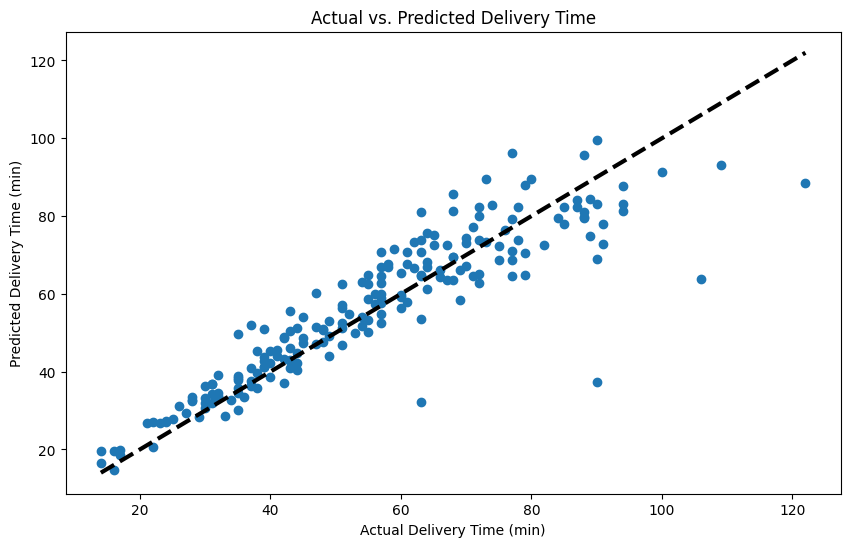

In [28]:
 plt.figure(figsize=(10, 6))
 plt.scatter(y_test, y_pred)
 plt.xlabel("Actual Delivery Time (min)")
 plt.ylabel("Predicted Delivery Time (min)")
 plt.title("Actual vs. Predicted Delivery Time")
 plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
 plt.show()